In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("BTC-USD_stock_data.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2836 non-null   object 
 1   Open       2836 non-null   float64
 2   High       2836 non-null   float64
 3   Low        2836 non-null   float64
 4   Close      2836 non-null   float64
 5   Adj Close  2836 non-null   float64
 6   Volume     2836 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.2+ KB


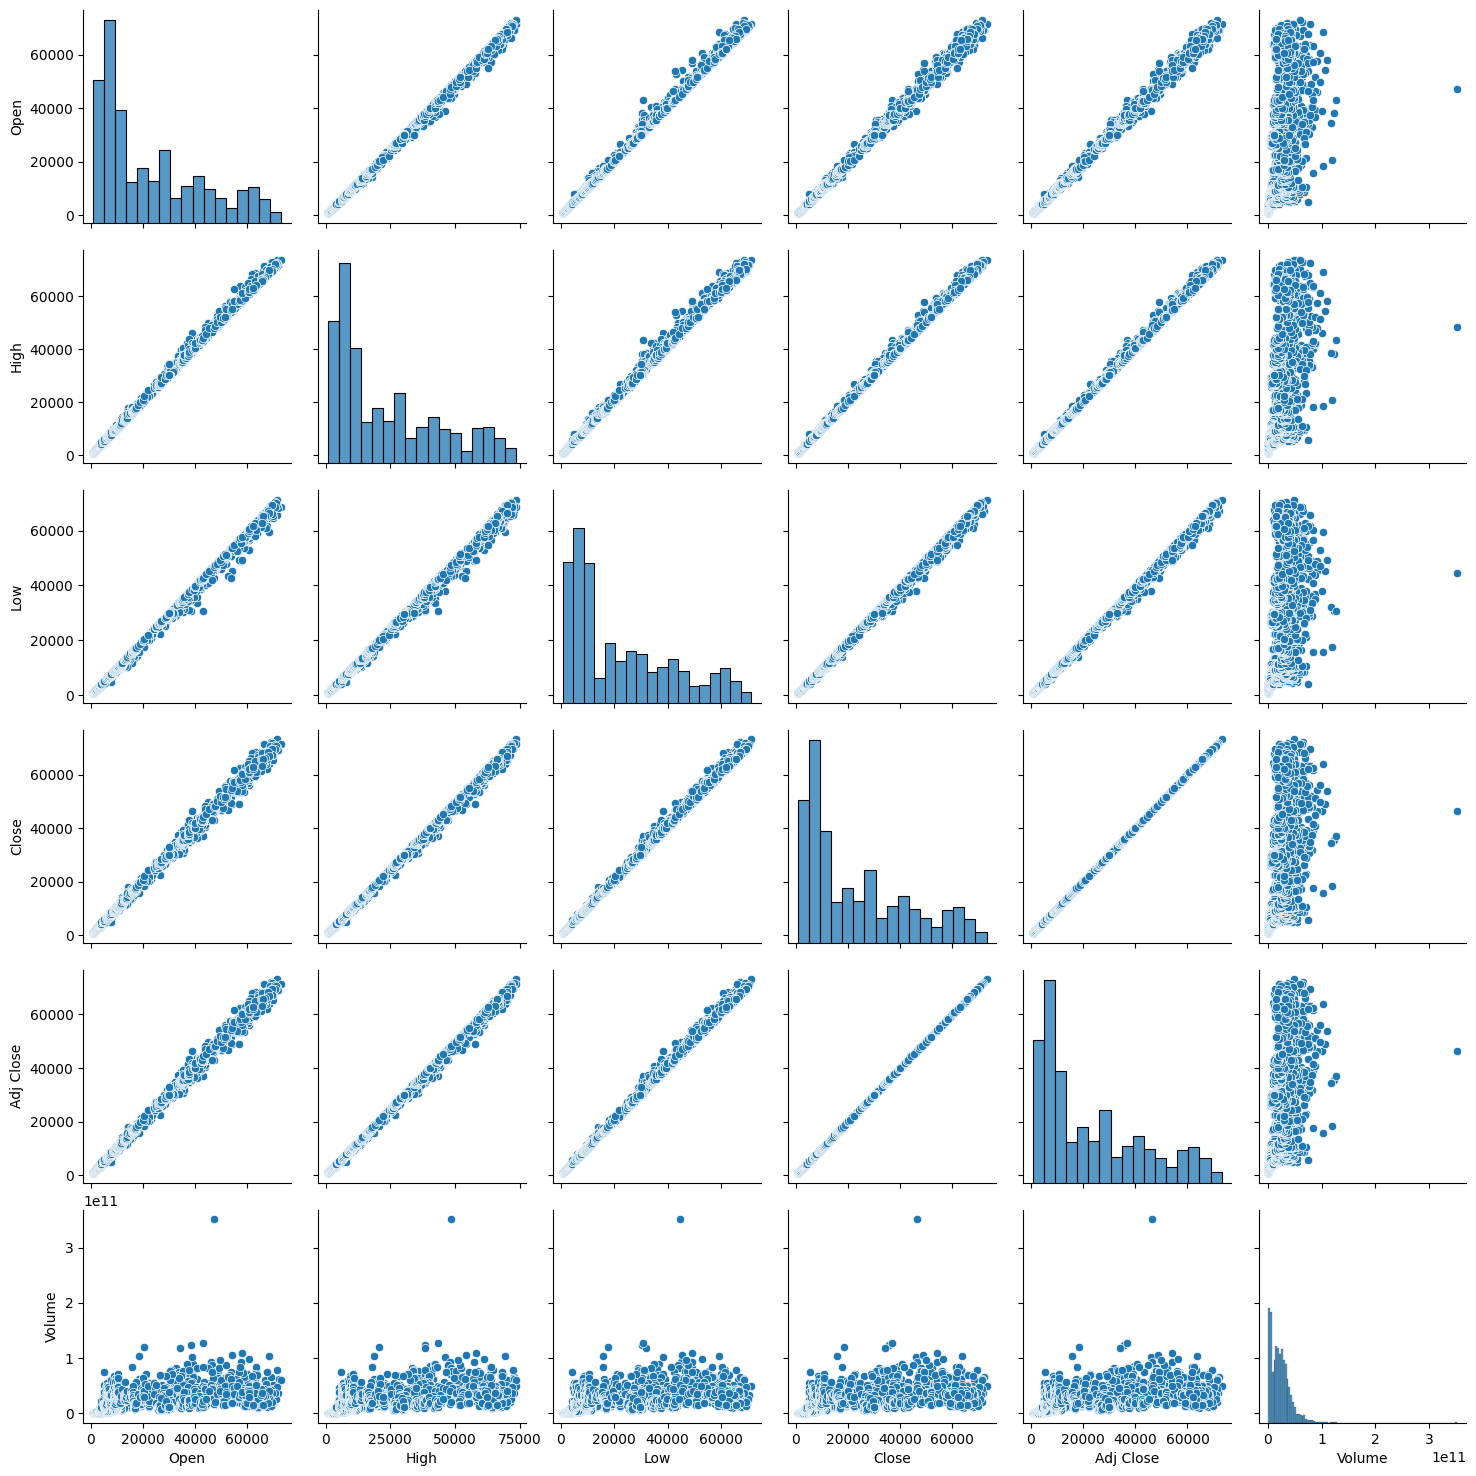

In [7]:
import seaborn as sns
sns.pairplot(df)

In [17]:
X = df.drop(columns=['Adj Close'])
Y = df['Adj Close']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=10)

In [24]:
X_train.shape

(2127, 6)

In [26]:
Y_train.shape

(2127,)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
scaler

StandardScaler()

In [32]:
X_train['Date'] = pd.to_datetime(X_train['Date'])
X_test['Date'] = pd.to_datetime(X_test['Date'])



In [31]:
X_train

,Date,Open,High,Low,Close,Volume
1913,2022-03-29,47100.437500,48022.289062,47100.437500,47465.730469,31397059069
1182,2020-03-28,6467.253906,6467.500977,6117.837891,6242.193848,34885225901
1024,2019-10-22,8243.402344,8296.651367,8074.462891,8078.203125,16803377857
1991,2022-06-15,22196.730469,22642.671875,20178.376953,22572.839844,54912007015
2682,2024-05-06,64038.312500,65494.902344,62746.238281,63161.949219,28697928697
...,...,...,...,...,...,...
2009,2022-07-03,19242.095703,19558.269531,18966.951172,19297.076172,16390821947
1180,2020-03-26,6675.170898,6735.463867,6590.962891,6716.440430,35319797642
1344,2020-09-06,10167.216797,10353.927734,10056.885742,10280.351562,37071460174
527,2018-06-12,6905.819824,6907.959961,6542.080078,6582.359863,4654380032


In [34]:
X_train['Year'] = X_train['Date'].dt.year
X_train['Month'] = X_train['Date'].dt.month
X_train['Day'] = X_train['Date'].dt.day

X_test['Year'] = X_test['Date'].dt.year
X_test['Month'] = X_test['Date'].dt.month
X_test['Day'] = X_test['Date'].dt.day


In [36]:
X_train = X_train.drop(columns=['Date'])
X_test = X_test.drop(columns=['Date'])

In [70]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_test=scaler.transform(X_test)

In [71]:
X_train

array([[ 1.20064167,  1.19257821,  1.25777192, ...,  0.71352179,
        -0.99329549,  1.50470543],
       [-0.84897877, -0.85630612, -0.85873682, ..., -0.17608011,
        -0.99329549,  1.39066629],
       [-0.75938623, -0.76611874, -0.75768871, ..., -0.62088106,
         1.06389975,  0.70643145],
       ...,
       [-0.66234512, -0.66468347, -0.65530831, ..., -0.17608011,
         0.77001472, -1.11819478],
       [-0.82685661, -0.83458902, -0.83682722, ..., -1.06568201,
        -0.11164039, -0.43395994],
       [-0.70723912, -0.71633221, -0.69830679, ..., -0.17608011,
         0.18224465, -0.3199208 ]])

In [43]:
X_test

array([[ 0.48070458,  0.4597662 ,  0.43535393, ...,  0.26872084,
         0.18224465, -0.09184252],
       [-0.31114275, -0.32488362, -0.29199557, ...,  0.71352179,
         1.65166982, -0.54799908],
       [ 2.28143714,  2.25546086,  2.36374971, ...,  1.60312368,
        -0.40552542,  1.04854887],
       ...,
       [-0.83279717, -0.81665059, -0.82439083, ..., -0.17608011,
        -0.69941046, -1.11819478],
       [-0.84358672, -0.84860857, -0.83603551, ..., -1.06568201,
         1.06389975, -1.23223392],
       [ 0.8822618 ,  0.86785452,  0.83844457, ...,  0.26872084,
        -1.58106556, -0.77607736]])

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
regression=LinearRegression()

In [47]:
regression

LinearRegression()

In [72]:
regression.fit(X_train,Y_train)

LinearRegression()

In [73]:
print(regression.coef_)

[-2.81650691e-11  8.00355338e-11 -9.64064384e-11  1.98608341e+04
  2.27373675e-12 -9.09494702e-13 -2.13162821e-12  7.94031507e-13]


In [74]:
print(regression.intercept_)

23336.53605995483


In [75]:
reg_pred=regression.predict(X_test)

In [76]:
reg_pred

array([31780.73046875, 17104.19335937, 69265.9453125 ,  9650.17480469,
        3630.69995117, 16974.82617187, 35510.2890625 , 39978.390625  ,
       45868.94921875,  3252.90991211, 37796.79296875, 26272.29492188,
       46737.48046875,  7557.81982422, 23241.34570312,  5399.36523438,
       24436.35351562,   920.38201904,  7117.20751953,  9536.89257813,
        5337.88623047,  6973.52978516,  9525.75097656,  7354.12988281,
        7096.27978516, 67234.171875  , 25162.65429687, 15579.84863281,
       19142.3828125 , 21395.01953125,  9608.47558594,  6349.89990234,
       30101.265625  ,  9377.01367188, 11064.45800781,  6256.24023438,
       58116.9765625 , 63143.14453125,  8038.77001953, 10323.75585938,
       10990.87304688, 11815.98632813, 65097.1484375 ,  3911.484375  ,
       67706.9375    , 30432.546875  , 33922.9609375 ,  9795.94335938,
        9629.65820313, 53598.24609375,  7193.59912109, 68518.09375   ,
       41502.75      ,  5831.16748047, 20818.4765625 ,  1061.34997559,
      

In [77]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Test Predicted Data')

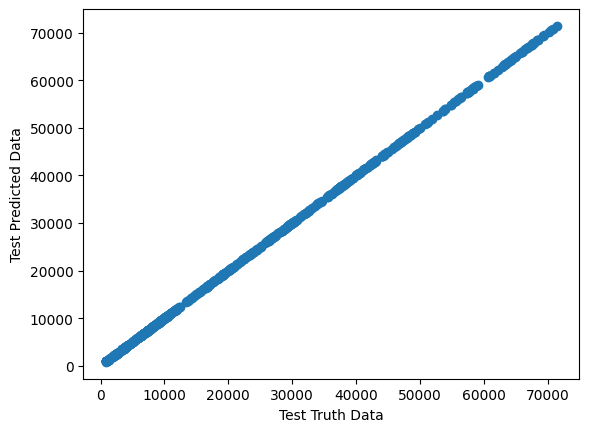

In [86]:
plt.scatter(Y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [79]:
residuals=Y_test-reg_pred

In [80]:
residuals

1656    7.275958e-12
2170    3.637979e-12
2701    2.910383e-11
1149   -1.273293e-11
264    -7.275958e-12
            ...     
381    -2.000888e-11
2733    2.910383e-11
1191   -1.455192e-11
642    -7.275958e-12
1469    0.000000e+00
Name: Adj Close, Length: 709, dtype: float64

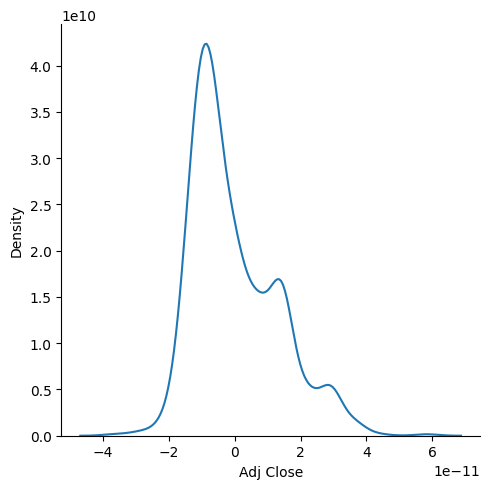

In [81]:
sns.displot(residuals,kind="kde")

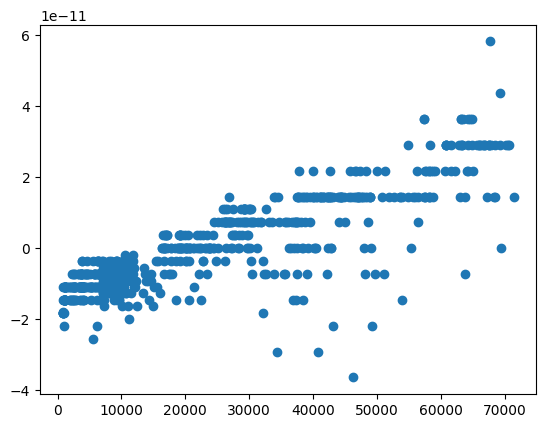

In [82]:
plt.scatter(reg_pred,residuals)

In [83]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

1.6844970977664026e-22
1.0503124463245829e-11
1.2978817734163627e-11


In [84]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

1.0


In [85]:
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

1.0